# Final Project- Part B
### Group 18
__________________

In [1]:
# imports packages we need
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import numpy as np

from scipy.stats import norm
from scipy import stats
from scipy.spatial import distance

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn import metrics
from c_index import (calc_c_index, calc_cindex_clusterSim_implementation,
calc_cindex_nbclust_implementation,
pdist_array)
import warnings
warnings.filterwarnings("ignore")

C:\Users\elino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### read the csv file

In [2]:
# read the data
df = pd.read_csv('clustering_data.csv')
df.head()

Unnamed: 0  feature 1  feature 2  feature 3  feature 4  feature 5  \
0           0  -1.784220   9.139177   2.517077  -6.691300   3.332583   
1           1   4.513056  -6.242134  -9.764999   8.975386   0.213133   
2           2   1.076570  -6.806062 -11.354346  11.589776   1.223487   
3           3  -0.203146  -6.098289  10.389102  -3.527880  -6.376361   
4           4  -4.488164   9.539276   0.414895  -3.298754   4.835677   

   feature 6  feature 7  feature 8  feature 9  feature 10  
0  -6.189314  -8.294717  -5.527558  -9.150377   -3.437419  
1  -5.610271   6.194787  -0.247325  -1.000023   -9.091131  
2  -4.481565   5.119435  -0.036395  -2.308850   -5.820222  
3   3.444334  -0.331659  -3.784060  -6.922082   -3.463537  
4  -6.927819  -9.123490  -3.135282 -10.179017   -3.273429

we can see that the dirst column is not relevant so we delete it and shows statistics on the data (all the data is numeric)

In [3]:
df=df.iloc[:,1:]  # drop the first column 
df.describe()     # describe

feature 1    feature 2    feature 3    feature 4    feature 5  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     -0.058067    -0.652801     0.340646    -0.657468    -0.140713   
std       4.985677     6.041751     7.507013     5.203314     3.240087   
min     -10.766832   -11.994511   -13.340450    -9.713562    -9.081393   
25%      -3.156292    -5.558896    -7.589439    -4.771484    -1.773954   
50%      -0.774796    -0.793572     2.038051    -1.542587     0.529864   
75%       3.255897     1.480191     7.622533     1.259217     2.143197   
max      12.238539    13.707162    12.448849    12.053077     6.302356   

         feature 6    feature 7    feature 8    feature 9   feature 10  
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  
mean     -3.201743    -0.924817    -0.042125    -5.532473    -4.036382  
std       4.256396     7.213071     3.969351     4.101869     2.805283  
min     -11.339145   -11.861602    -8.073032   -12.742542   -11.304777  
25%      -6.712819    -7.586765    -3.609371    -8.919789    -6.126161  
50%      -5.118522    -3.083608    -0.396338    -7.425201    -4.336525  
75%       1.111768     5.737658     3.519774    -1.306876    -2.232566  
max       6.789144    13.841431     9.729432     4.325894     3.408461

here we can see the absolute number of missing data and the precantage <br>
<b> we can see that we do not have missing values

In [4]:
# Calculte precantage of missing data
total = df.isnull().sum().sort_values(ascending=False)                                # calculate number of nulls and sort
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100    # save also in precentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])               # concat them
missing_data

Total    %
feature 10      0  0.0
feature 9       0  0.0
feature 8       0  0.0
feature 7       0  0.0
feature 6       0  0.0
feature 5       0  0.0
feature 4       0  0.0
feature 3       0  0.0
feature 2       0  0.0
feature 1       0  0.0

we can see the data types <b> all the data is numeric in float64 type

In [5]:
# check the data types
df.dtypes

feature 1     float64
feature 2     float64
feature 3     float64
feature 4     float64
feature 5     float64
feature 6     float64
feature 7     float64
feature 8     float64
feature 9     float64
feature 10    float64
dtype: object

we can see the distributions for each column in the data and in the black curve e can see the comparing to normal distibutions

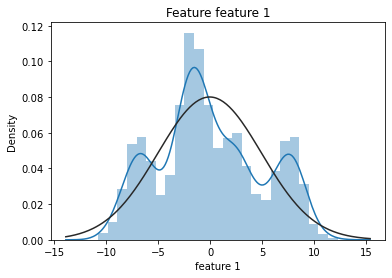

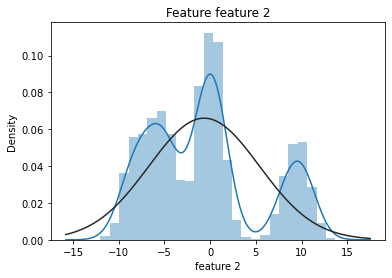

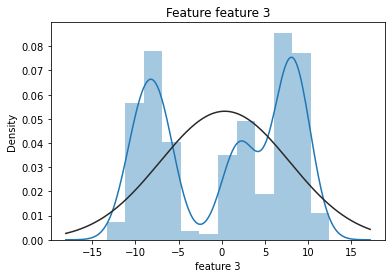

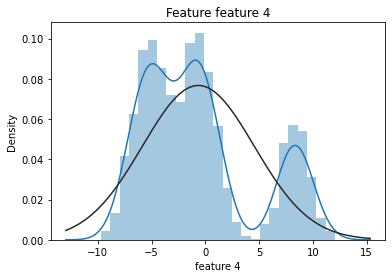

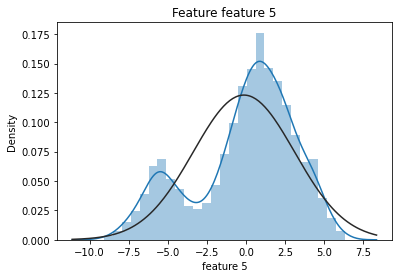

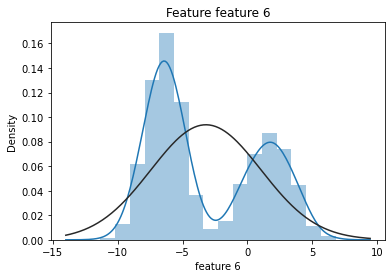

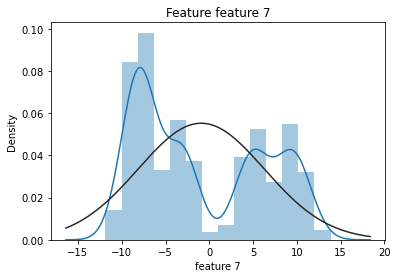

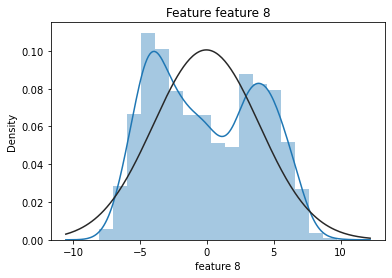

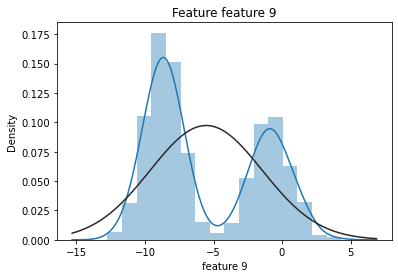

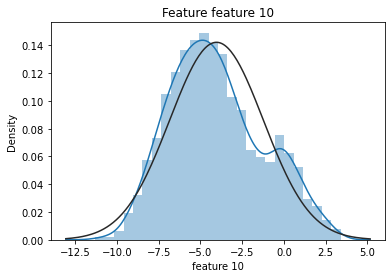

In [6]:
# Column distributions
def distributions(df):
    for i in df.columns:                      # for each column plot it's hostogram
        plt.figure(i)
        plt.title('Feature ' + str(i))
        sns.distplot(df[i], fit = norm);     # for each column append the normal curve for comparing
distributions(df)

we can see the pair plot for each 2 columns so we can learn the connection between them

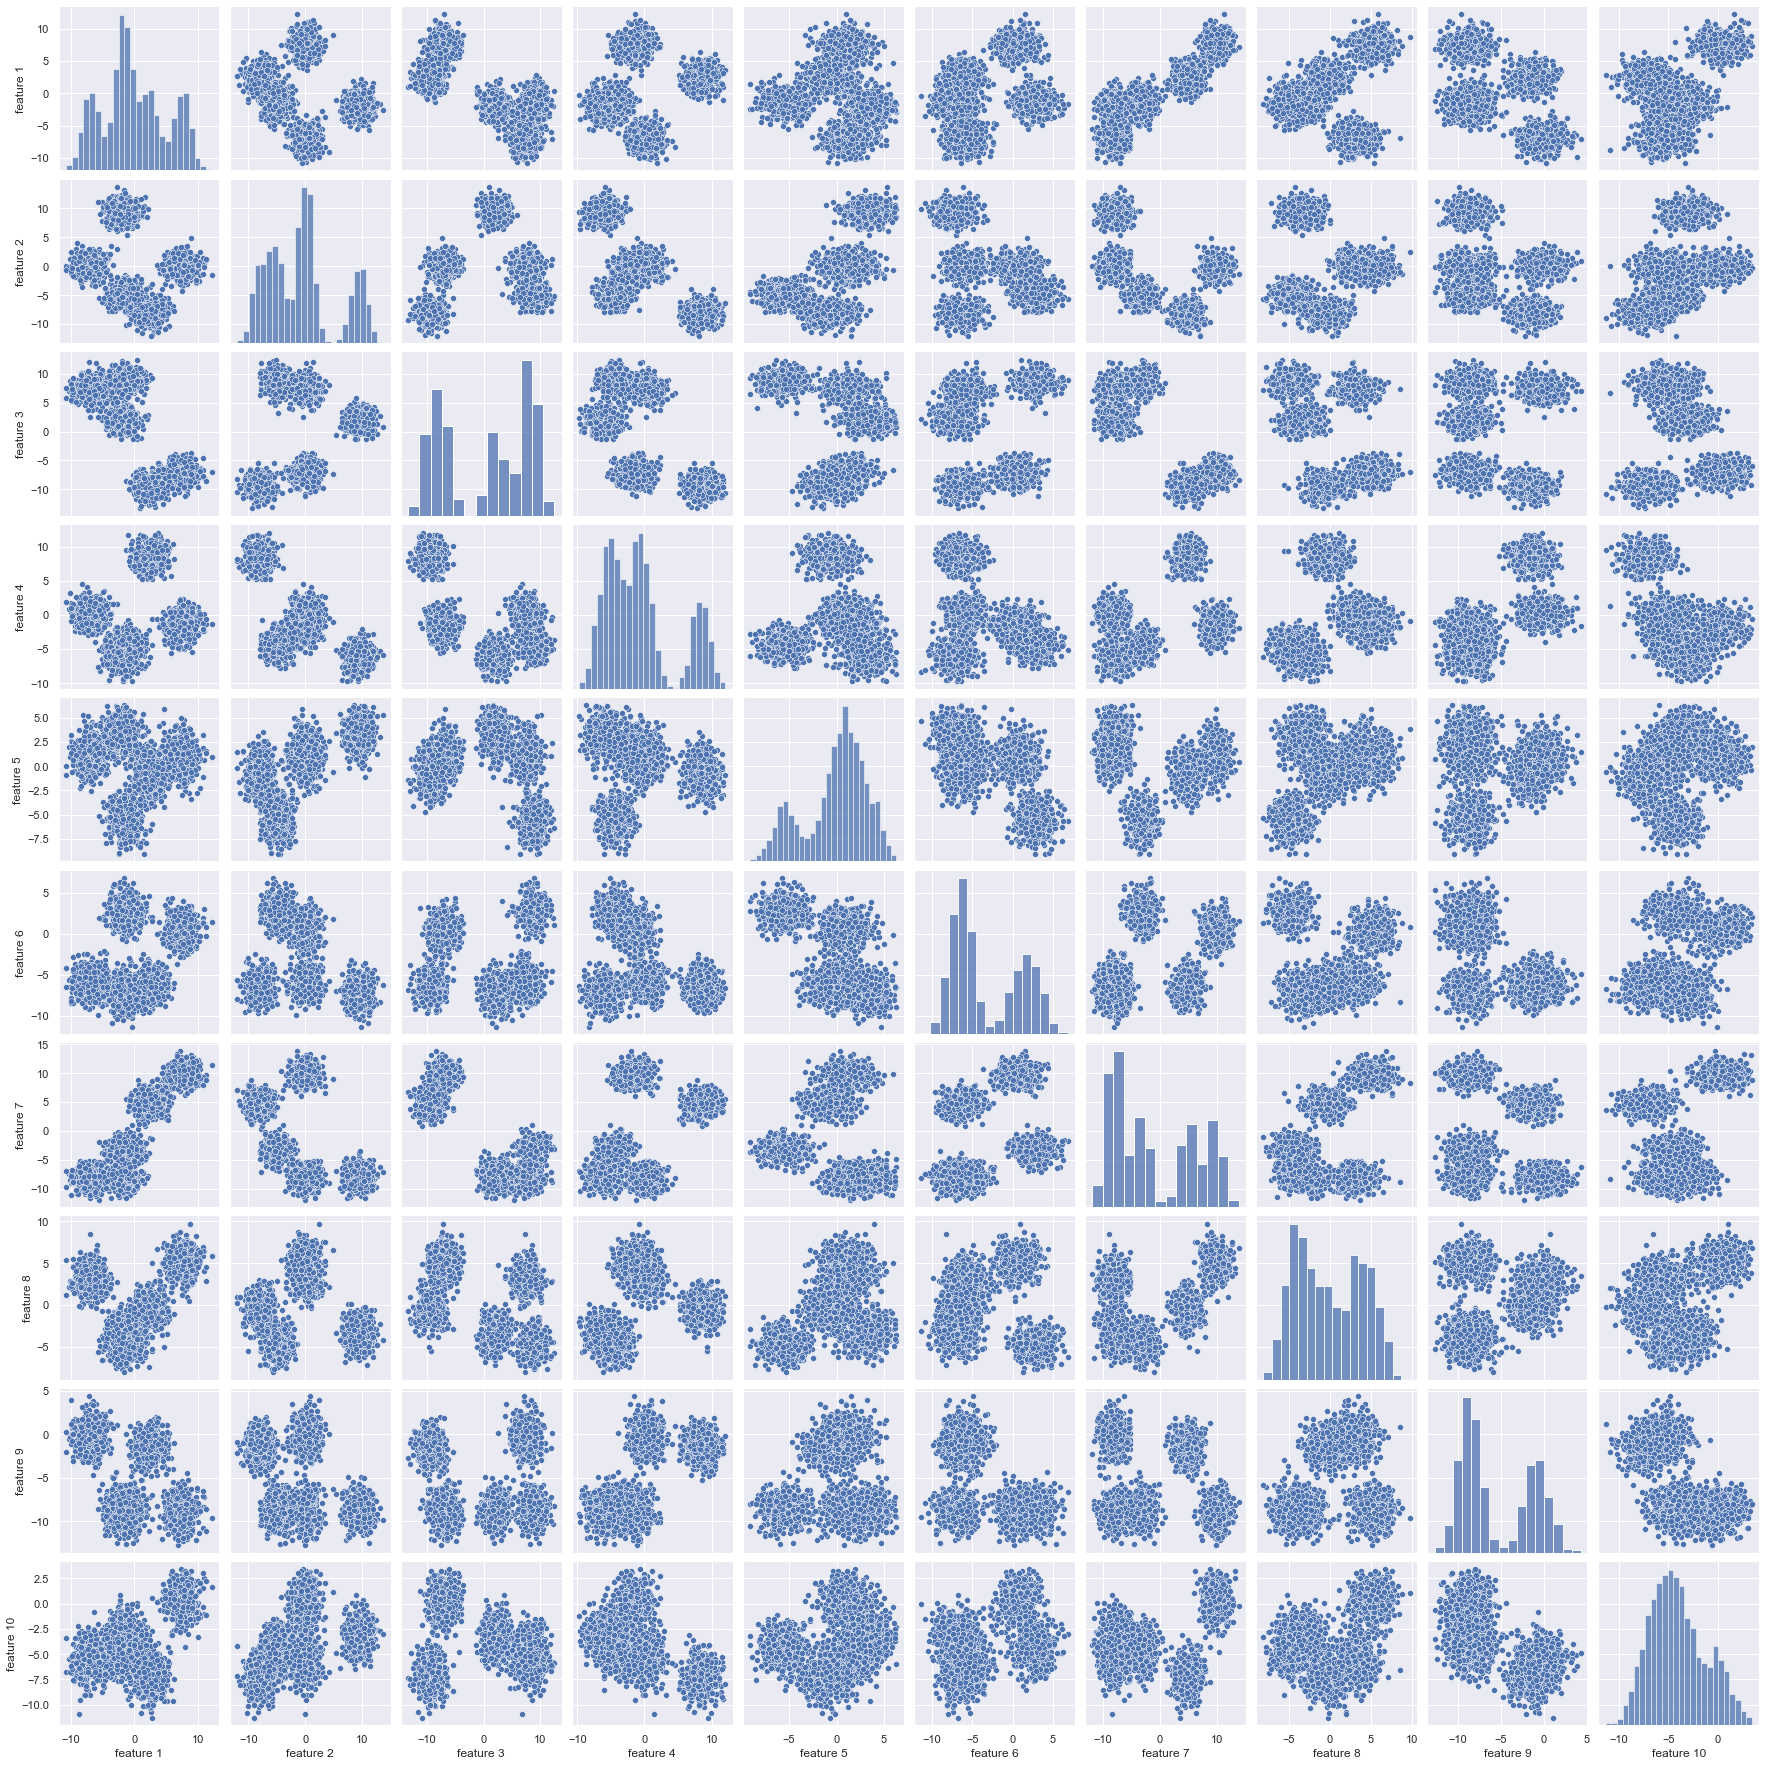

In [7]:
sns.set()
sns.pairplot(df)   # plot the pairs plot
plt.show();

we can see the boxplot for each column in the data so we can see in first looking if we think that we have outliers

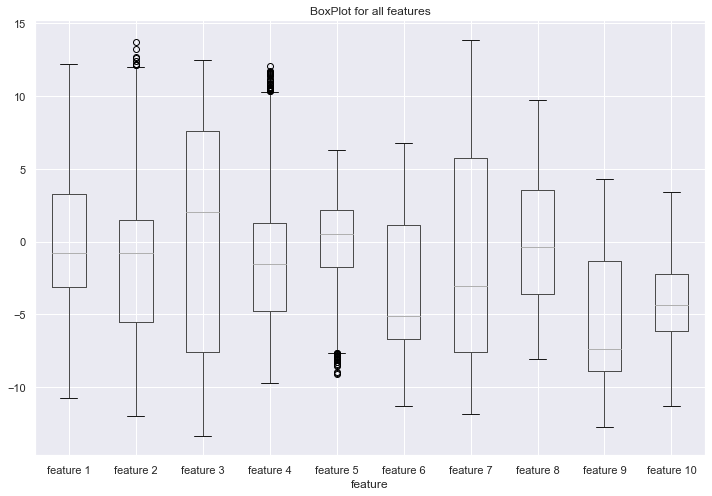

In [8]:
def create_boxplot(df,title):
    boxplot = df.boxplot(figsize=(12,8))    # show the boxplot for all the columns
    plt.title('BoxPlot for %s'%(title))
    plt.xlabel('feature')
    
create_boxplot(df,'all features')

## Dimensionality reduction

We have reduced the dimensions of the data to the 2 most important features in terms of the variability explained according to PCA. This is to allow easy visualization of the clusters in a two-dimensional graph.

In [9]:
# transform the data- pca
pca = PCA(2)                     # choose 2 components  
df_pca = pca.fit_transform(df)   # Transform the data
df_pca.shape

(2500, 2)

# K- means 

## Find the best k with elbow method. 
If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k.<br>
That is, before this point you notice a relatively large improvement and after that you already reach an asymptote that does not affect with increasing K.

In [10]:
# this function plots the sum of squared distances for each k 
def find_best_k(df,max_k):
    Sum_of_squared_distances = []                        # save in this list the SS measure
    K = range(1,max_k)                                   # define the range for k that we will check
    for k in K:
        km = KMeans(n_clusters=k)                        # create K means object and fit it
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)     # update the ss distance
    plt.plot(K, Sum_of_squared_distances, 'bx-')         # plot for each k the ss distance
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

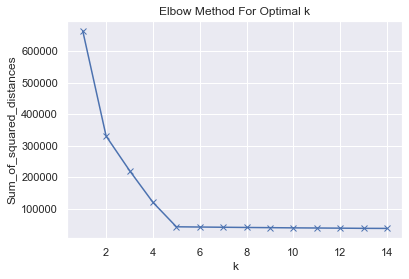

In [11]:
find_best_k(df,15)    # for the original data

We can see that the best k is 5 

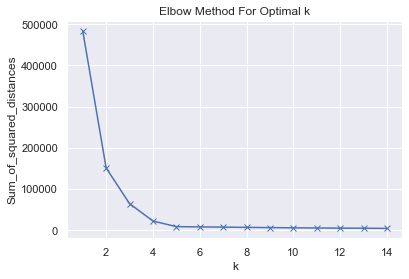

In [12]:
find_best_k(df_pca,15) # for the 2 dimension data

We can see that the best k is 5 <br>
<b>We can see that after and before PCA the best k we got is 5 so we will use this k.

In [13]:
# this function fit and plot the k means and calculate the scores for the cluster with 3 different measures we learnd
def kmeans(df,k):
    # Initialize the class object
    kmeans = KMeans(n_clusters= k)
    # predict the labels of clusters.
    label = kmeans.fit_predict(df)

    # Getting the unique labels
    u_labels = np.unique(label)

    # plotting the results:
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.legend()
    plt.title('Kmeans with k=5')
    plt.show()
    return davies_bouldin_score(df, label),metrics.silhouette_score(df, label, metric='euclidean'), calc_c_index(df, label)

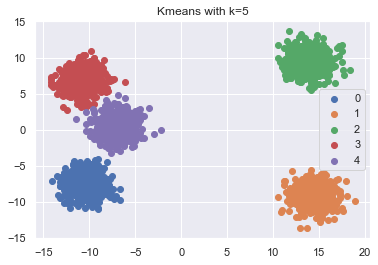

In [14]:
davies_bouldin_k,silhouette_k,calc_c_index_k=kmeans(df_pca,5)

##### explanation:
First we found the optimal K according to the elbow method that we learned and then we ran this clustering model to find the 5 clusters in the data set. Finally we presented a visualization of the clusters and kept 3 selected metrics. <br>
As can be seen above, the KMeans algorithm gave us good results with k=5 that we found the best for this data.

<br>In the below windows, we will run the DBSCAN algorithm and then we will compare them with 3 measures.

# DBSCAN

## Find the best paremeters 
### find epsilon using elbow method :
This technique calculates the average distance between each point and its k nearest neighbors. The average k-distances are then plotted in ascending order on a k-distance graph. Our value for ε at the point of maximum curvature

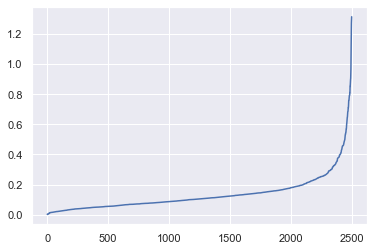

In [15]:
# Calculate the average distance between each point in the data set and its 20 nearest neighbors 
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_pca) 
distances, indices = neighbors_fit.kneighbors(df_pca) 
# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<b> The result: Our starting epsilon will be 0.5

In [16]:
# This function get dbscan parameters(data, epsilon and minimum samples) and fit cluster. Then calc the silhouette_score and plot the cluster.
# the function return the number of cluster and the silhouette score
def db_param(df,eps,min_samples):
    D = distance.squareform(distance.pdist(df))     # calc the distance 
    # Compute DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)   # create dbscan object and fit
    db.fit(df)                               
    core_samples = db.core_sample_indices_          # save the core samples and the labels
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print ('Estimated number of clusters: %d' % n_clusters_)

    print ("Silhouette Coefficient: %0.3f" %
           metrics.silhouette_score(D, labels, metric='precomputed'))

    ##############################################################################
    # Plot result
    import pylab as pl
    from itertools import cycle

    pl.close('all')
    pl.figure(1)
    pl.clf()

    # Black removed and is used for noise instead.
    colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
    for k, col in zip(set(labels), colors):
        if k == -1:
            # Black used for noise.
            col = 'k'
            markersize = 6
        # save the index where the label is k
        class_members = [index[0] for index in np.argwhere(labels == k)]
        # save the index for all the core samples we found if the label is k
        cluster_core_samples = [index for index in core_samples if labels[index] == k]
        # plot the data according to k and core samples
        for index in class_members:
            x = df[index]
            if index in core_samples and k != -1:
                markersize = 14
            else:
                markersize = 6
            pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                    markeredgecolor='k', markersize=markersize)

    pl.title('Estimated number of clusters: %d' % n_clusters_)
    pl.show()
    
    return n_clusters_,metrics.silhouette_score(D, labels, metric='precomputed')

### find epsilon and min number of samples using a gridi method :
we will send to db_param func diffrent parameters and then find the parameter with the best silhouette score. 
Then we will set that parameters to find the second parameter until it stops changing.
##### min_samples

check the min sample parameter with:  1
Estimated number of clusters: 91
Silhouette Coefficient: -0.126


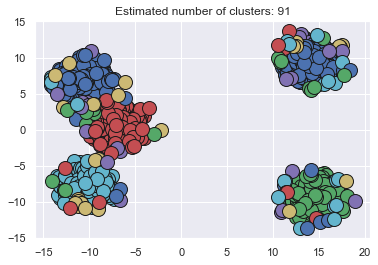

check the min sample parameter with:  2
Estimated number of clusters: 34
Silhouette Coefficient: -0.036


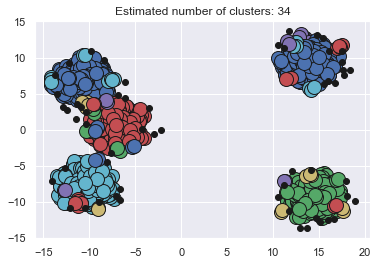

check the min sample parameter with:  3
Estimated number of clusters: 19
Silhouette Coefficient: 0.091


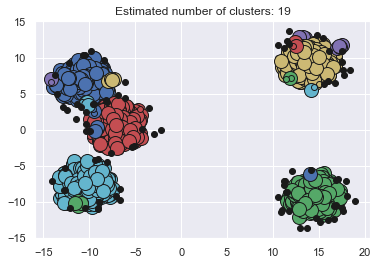

check the min sample parameter with:  4
Estimated number of clusters: 10
Silhouette Coefficient: 0.285


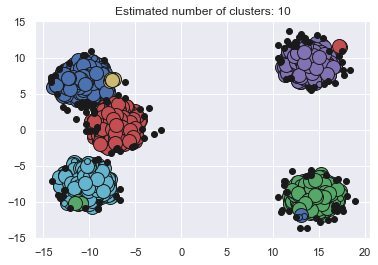

check the min sample parameter with:  5
Estimated number of clusters: 12
Silhouette Coefficient: 0.271


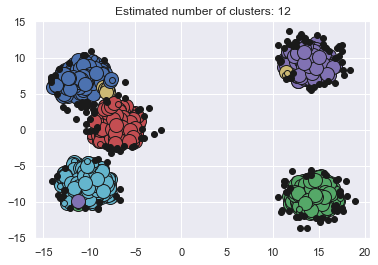

check the min sample parameter with:  6
Estimated number of clusters: 10
Silhouette Coefficient: 0.350


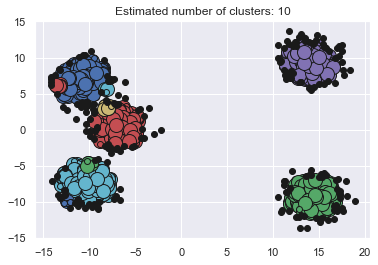

check the min sample parameter with:  7
Estimated number of clusters: 10
Silhouette Coefficient: 0.325


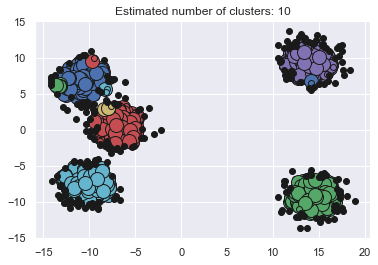

check the min sample parameter with:  8
Estimated number of clusters: 8
Silhouette Coefficient: 0.501


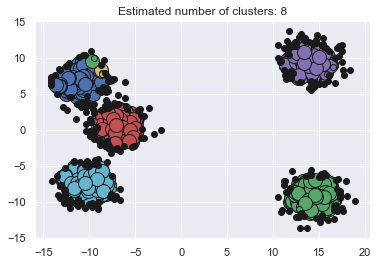

check the min sample parameter with:  9
Estimated number of clusters: 7
Silhouette Coefficient: 0.492


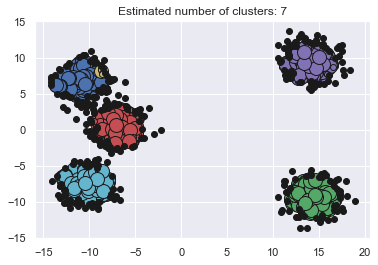

check the min sample parameter with:  10
Estimated number of clusters: 6
Silhouette Coefficient: 0.493


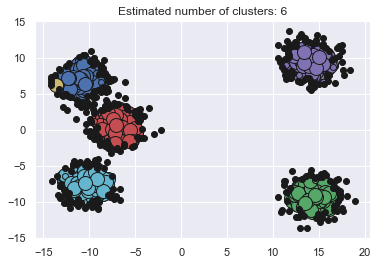

check the min sample parameter with:  11
Estimated number of clusters: 6
Silhouette Coefficient: 0.463


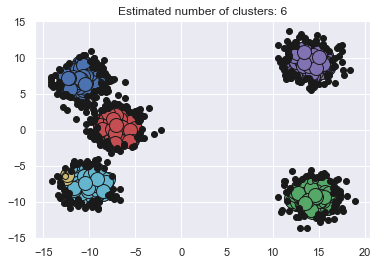

check the min sample parameter with:  12
Estimated number of clusters: 6
Silhouette Coefficient: 0.451


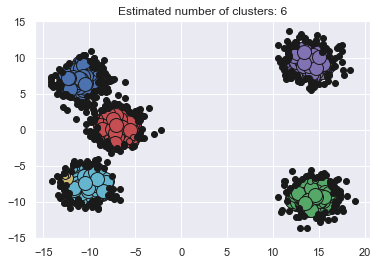

check the min sample parameter with:  13
Estimated number of clusters: 7
Silhouette Coefficient: 0.360


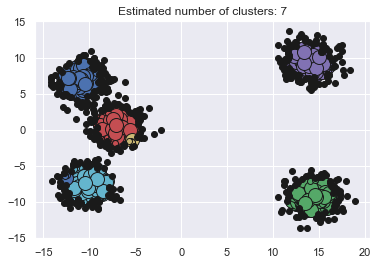

check the min sample parameter with:  14
Estimated number of clusters: 5
Silhouette Coefficient: 0.493


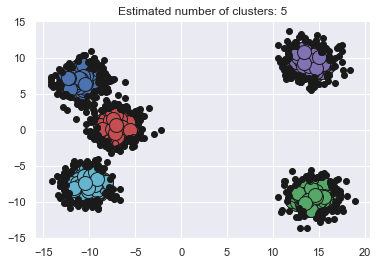

check the min sample parameter with:  15
Estimated number of clusters: 5
Silhouette Coefficient: 0.469


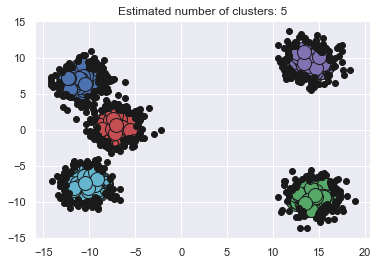

check the min sample parameter with:  16
Estimated number of clusters: 5
Silhouette Coefficient: 0.434


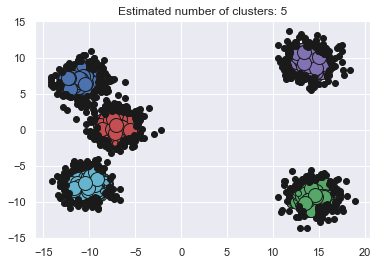

check the min sample parameter with:  17
Estimated number of clusters: 5
Silhouette Coefficient: 0.406


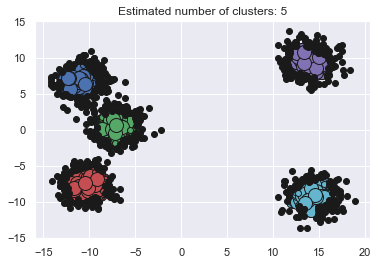

check the min sample parameter with:  18
Estimated number of clusters: 5
Silhouette Coefficient: 0.353


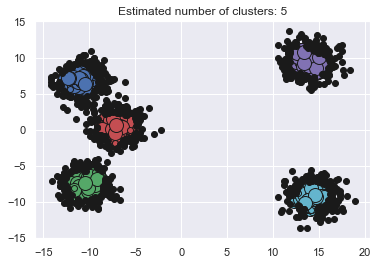

check the min sample parameter with:  19
Estimated number of clusters: 5
Silhouette Coefficient: 0.321


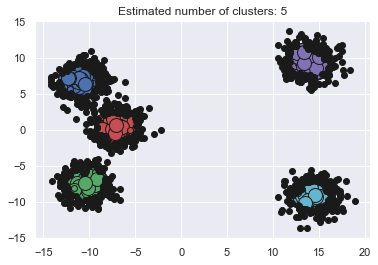

check the min sample parameter with:  20
Estimated number of clusters: 5
Silhouette Coefficient: 0.291


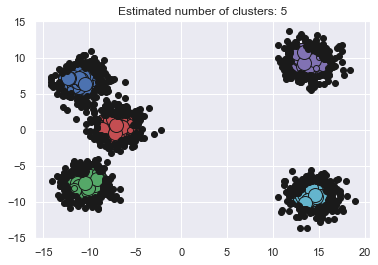

check the min sample parameter with:  21
Estimated number of clusters: 6
Silhouette Coefficient: 0.190


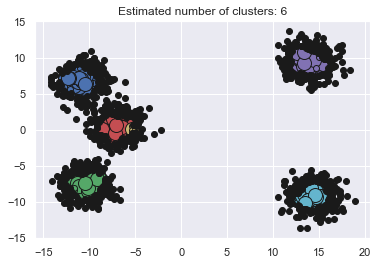

check the min sample parameter with:  22
Estimated number of clusters: 6
Silhouette Coefficient: 0.145


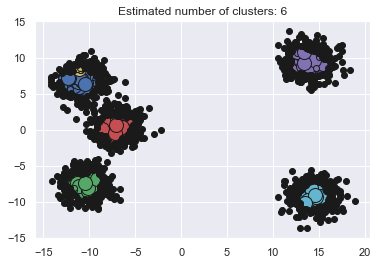

check the min sample parameter with:  23
Estimated number of clusters: 6
Silhouette Coefficient: 0.121


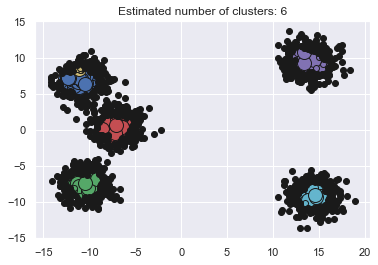

check the min sample parameter with:  24
Estimated number of clusters: 6
Silhouette Coefficient: 0.078


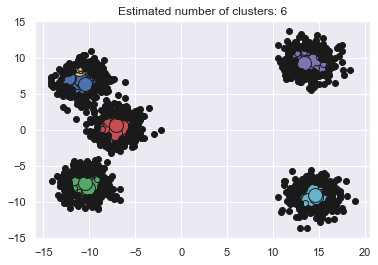

In [17]:
silhouette_score=[]                               # list of all the silhoute scores
for sample in range(1,25):                        # the range that we will check on the score
    print('check the min sample parameter with: ',sample)
    n_cluster,sc=db_param(df_pca,0.5,sample)      # Our initial epsilon will be 0.5 that we got above from the elbow method
    silhouette_score.append(sc)                   # save the score

In [18]:
# check the best parameter for min sample according all the scores we got from above
print('best number of min samples is:', np.argmax(silhouette_score)+1)
# save the best parameter that we found
temp_min_samples=np.argmax(silhouette_score)+1

best number of min samples is: 8


##### epsilon
now we found the parameters for epsilon and min_sample for DBSCAN. and we will check <b> epsilon </b> again to see if there is changes

check the epsilon parameter with:  0.3
Estimated number of clusters: 19
Silhouette Coefficient: -0.277


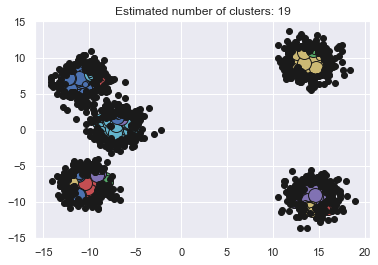

check the epsilon parameter with:  0.4
Estimated number of clusters: 9
Silhouette Coefficient: 0.267


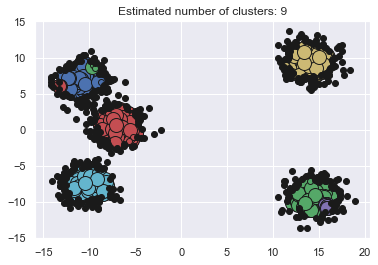

check the epsilon parameter with:  0.5
Estimated number of clusters: 8
Silhouette Coefficient: 0.501


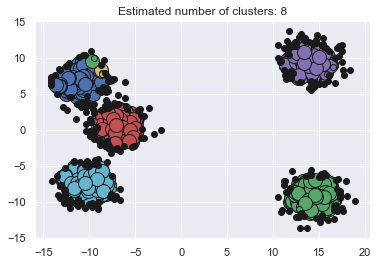

check the epsilon parameter with:  0.6
Estimated number of clusters: 5
Silhouette Coefficient: 0.680


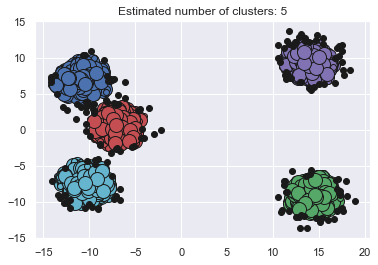

check the epsilon parameter with:  0.7
Estimated number of clusters: 5
Silhouette Coefficient: 0.712


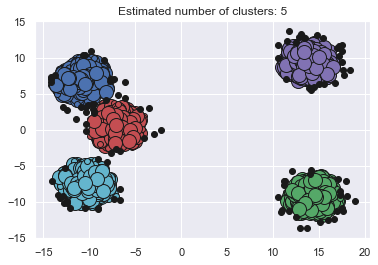

check the epsilon parameter with:  0.8
Estimated number of clusters: 5
Silhouette Coefficient: 0.733


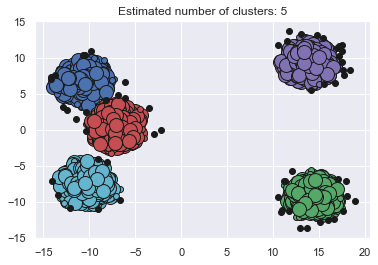

check the epsilon parameter with:  0.9
Estimated number of clusters: 4
Silhouette Coefficient: 0.693


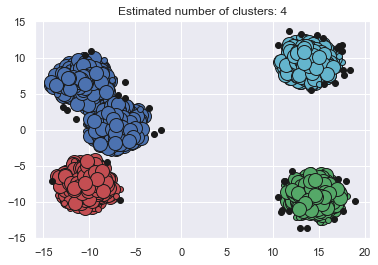

check the epsilon parameter with:  1
Estimated number of clusters: 4
Silhouette Coefficient: 0.699


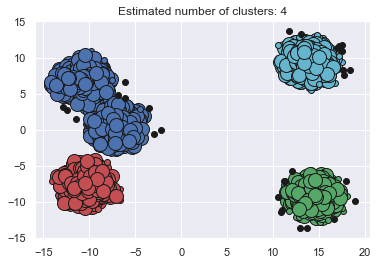

In [19]:
silhouette_score=[]                                        # list of all the silhoute scores
epsilon=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]                    # list of our epsilons that we will check on the score
for eps in epsilon:
    print('check the epsilon parameter with: ',eps)
    n_cluster,sc=db_param(df_pca,eps,temp_min_samples)     # we will set min points that we got from the last iteration 
    silhouette_score.append(sc)                            # save the score
    

In [20]:
# check the best parameter for epsilon according all the scores we got from above
print('best epsilon is:', epsilon[np.argmax(silhouette_score)])
# save the best parameter that we found
temp_epsilon=epsilon[np.argmax(silhouette_score)]

best epsilon is: 0.8


##### min_samples
now we found the parameters for epsilon and min_sample for DBSCAN. and we will check <b>min_sample </b> again to see if there is changes

check the min sample parameter with:  1
Estimated number of clusters: 24
Silhouette Coefficient: -0.011


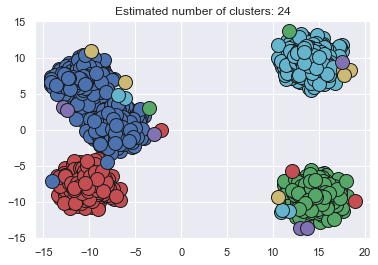

check the min sample parameter with:  2
Estimated number of clusters: 8
Silhouette Coefficient: 0.331


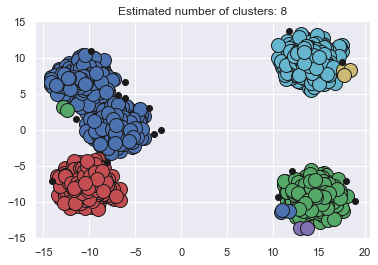

check the min sample parameter with:  3
Estimated number of clusters: 6
Silhouette Coefficient: 0.534


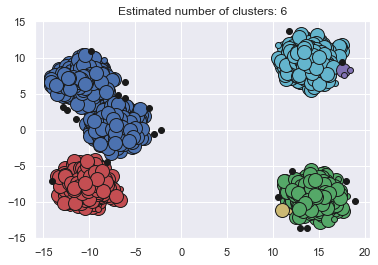

check the min sample parameter with:  4
Estimated number of clusters: 5
Silhouette Coefficient: 0.618


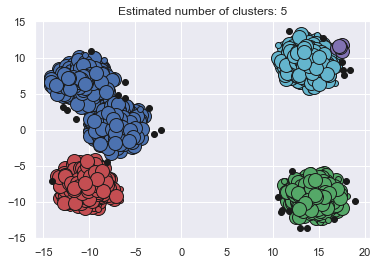

check the min sample parameter with:  5
Estimated number of clusters: 6
Silhouette Coefficient: 0.658


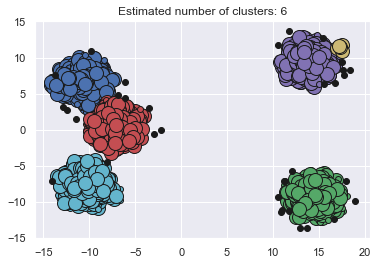

check the min sample parameter with:  6
Estimated number of clusters: 6
Silhouette Coefficient: 0.655


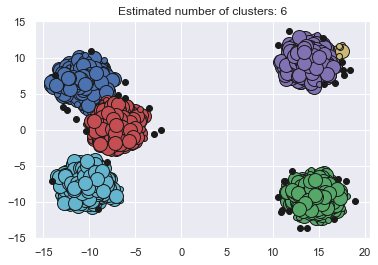

check the min sample parameter with:  7
Estimated number of clusters: 5
Silhouette Coefficient: 0.735


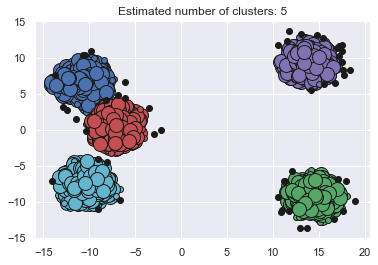

check the min sample parameter with:  8
Estimated number of clusters: 5
Silhouette Coefficient: 0.733


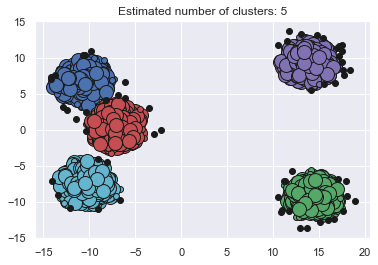

check the min sample parameter with:  9
Estimated number of clusters: 5
Silhouette Coefficient: 0.730


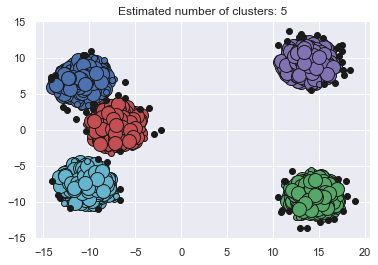

check the min sample parameter with:  10
Estimated number of clusters: 5
Silhouette Coefficient: 0.725


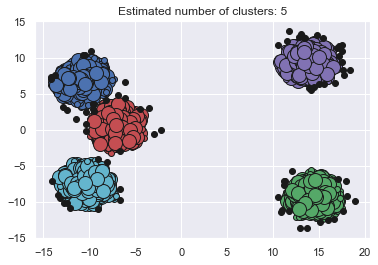

check the min sample parameter with:  11
Estimated number of clusters: 5
Silhouette Coefficient: 0.721


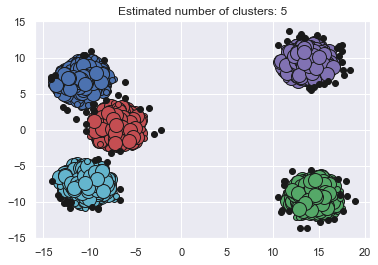

check the min sample parameter with:  12
Estimated number of clusters: 5
Silhouette Coefficient: 0.715


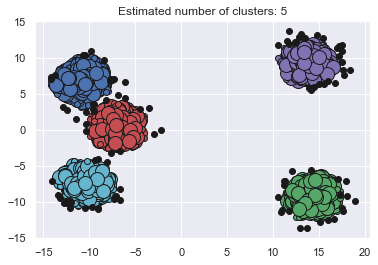

check the min sample parameter with:  13
Estimated number of clusters: 5
Silhouette Coefficient: 0.709


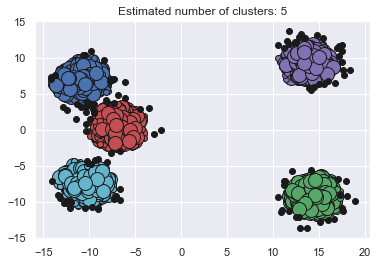

check the min sample parameter with:  14
Estimated number of clusters: 5
Silhouette Coefficient: 0.705


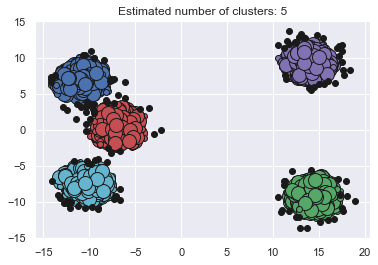

check the min sample parameter with:  15
Estimated number of clusters: 5
Silhouette Coefficient: 0.704


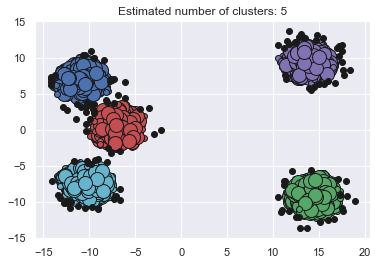

check the min sample parameter with:  16
Estimated number of clusters: 5
Silhouette Coefficient: 0.696


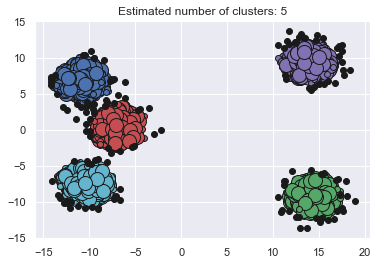

check the min sample parameter with:  17
Estimated number of clusters: 5
Silhouette Coefficient: 0.689


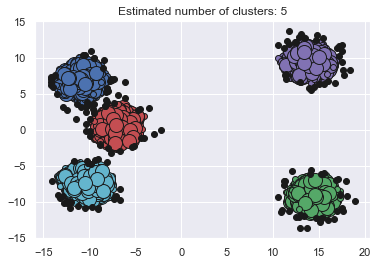

check the min sample parameter with:  18
Estimated number of clusters: 5
Silhouette Coefficient: 0.684


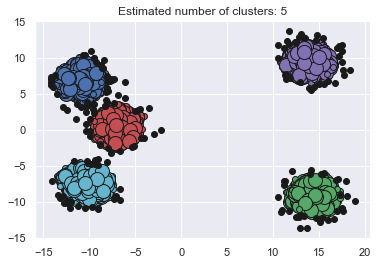

check the min sample parameter with:  19
Estimated number of clusters: 5
Silhouette Coefficient: 0.678


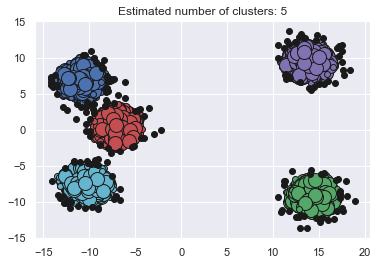

check the min sample parameter with:  20
Estimated number of clusters: 5
Silhouette Coefficient: 0.671


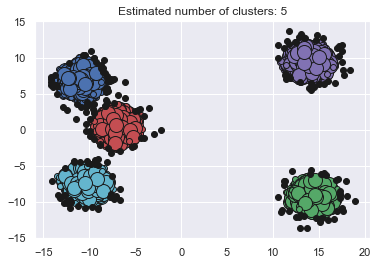

check the min sample parameter with:  21
Estimated number of clusters: 5
Silhouette Coefficient: 0.669


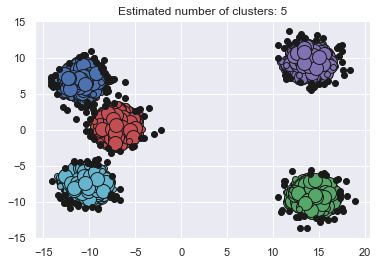

check the min sample parameter with:  22
Estimated number of clusters: 5
Silhouette Coefficient: 0.667


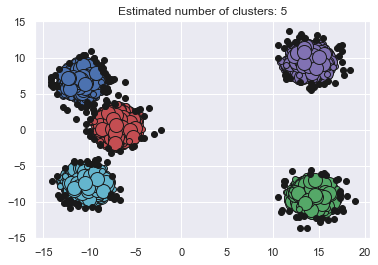

check the min sample parameter with:  23
Estimated number of clusters: 5
Silhouette Coefficient: 0.661


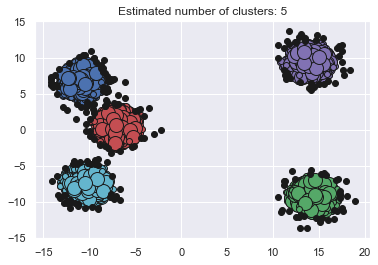

check the min sample parameter with:  24
Estimated number of clusters: 5
Silhouette Coefficient: 0.655


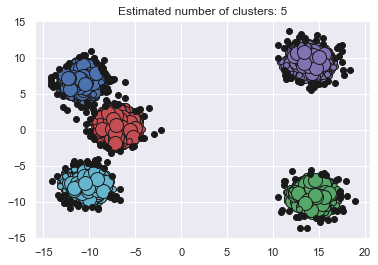

In [21]:
silhouette_score=[]                                        # list of all the silhoute scores
for sample in range(1,25):                                 # the range that we will check on the score
    print('check the min sample parameter with: ',sample)
    n_cluster,sc=db_param(df_pca,temp_epsilon,sample)      # we will set epsilon to be we got from the last iteration
    silhouette_score.append(sc)                            # save the score

In [22]:
# check the best parameter for min sample according all the scores we got from above
print('best number of min samples is:', np.argmax(silhouette_score)+1)
# save the best parameter that we found
temp_min_samples=np.argmax(silhouette_score)+1

best number of min samples is: 7


##### epsilon
now we found the parameters for epsilon and min_sample for DBSCAN. and we will check <b> epsilon </b> again to see if there is changes

check the epsilon parameter with:  0.3
Estimated number of clusters: 29
Silhouette Coefficient: -0.330


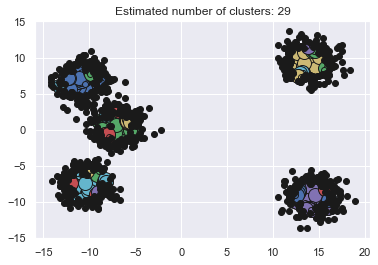

check the epsilon parameter with:  0.4
Estimated number of clusters: 8
Silhouette Coefficient: 0.416


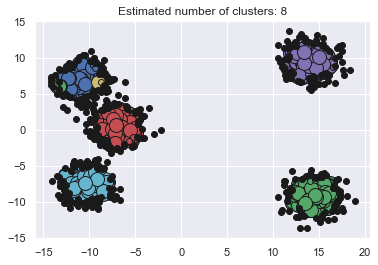

check the epsilon parameter with:  0.5
Estimated number of clusters: 10
Silhouette Coefficient: 0.325


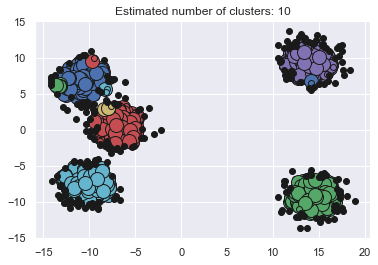

check the epsilon parameter with:  0.6
Estimated number of clusters: 6
Silhouette Coefficient: 0.578


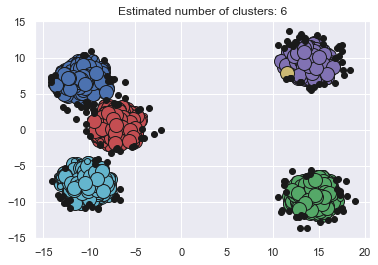

check the epsilon parameter with:  0.7
Estimated number of clusters: 5
Silhouette Coefficient: 0.721


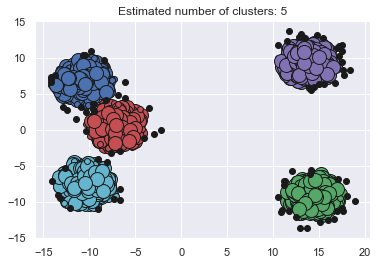

check the epsilon parameter with:  0.8
Estimated number of clusters: 5
Silhouette Coefficient: 0.735


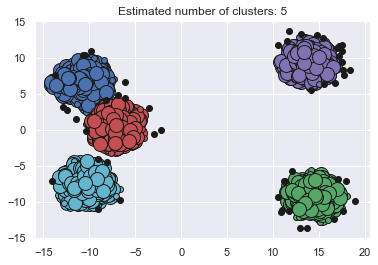

check the epsilon parameter with:  0.9
Estimated number of clusters: 4
Silhouette Coefficient: 0.696


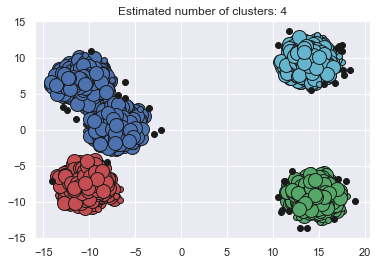

check the epsilon parameter with:  1
Estimated number of clusters: 4
Silhouette Coefficient: 0.700


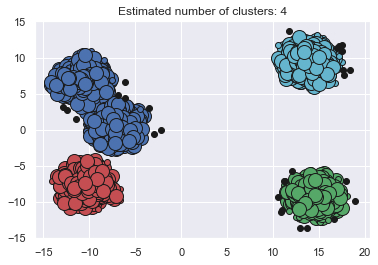

In [23]:
silhouette_score=[]                                       # list of all the silhoute scores
epsilon=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]                   # list of our epsilons that we will check on the score
for eps in epsilon:
    print('check the epsilon parameter with: ',eps)
    n_cluster,sc=db_param(df_pca,eps,temp_min_samples)    # we will set min points that we got from the last iteration 
    silhouette_score.append(sc)                           # save the score

In [24]:
# check the best parameter for epsilon according all the scores we got from above
print('best epsilon is:', epsilon[np.argmax(silhouette_score)])
# save the best parameter that we found
temp_epsilon=epsilon[np.argmax(silhouette_score)]

best epsilon is: 0.8


In this point the epsilon stop to change so the min_sample paramter will not change also according to this.
### Our final DBSCAN parematers are:
epsilon = 0.8 <br>
min point = 7

In [25]:
# this function fit and plot the dbscan and calculate (ad return) the scores for the cluster with 3 different measures we learnd
def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)       # create DBSCAN object
    db.fit(X)                                           # fit the model 
    y_pred = db.fit_predict(X)                          # predict the cluster
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired') # plot the clusters
    plt.title("DBSCAN")
    return davies_bouldin_score(X, y_pred),metrics.silhouette_score(X, y_pred, metric='euclidean'), calc_c_index(X, y_pred)

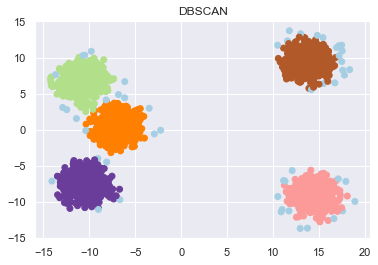

In [26]:
davies_bouldin_db,silhouette_db,calc_c_index_db=dbscan(df_pca,temp_epsilon,temp_min_samples)

##### explanation:
First we found init parameter for epsilon, then iteratively we found the best min_sample and the epsilon until one remained unchanged. Finally we presented a visualization of the clusters and kept 3 selected metrics with the best paramters we found. <br>
As can be seen above, there are many points that were classified as outliers. However, not all of this points are outliers. The algorithm gave us five clusters, as the KMeans algorithm. <br> Below you can find a comparison of both algorithms.

## Comparing Kmeans-DBSCAN
While running the algorithm with the best parameters for each method, we kept 3 different metrics related to examining the quality of the clusters: davies bouldin, silhouette and c-index.

In [27]:
# create data frame from the dbscan and kmeans scores so we can see the results
db=[davies_bouldin_db,silhouette_db,calc_c_index_db]  # create a list from the scores of DBSCAN
k=[davies_bouldin_k,silhouette_k,calc_c_index_k]      # create a list from the scores of KMEANS
df=[k,db]
df=pd.DataFrame(df)                                   # create the data frame and rename the columns
df=df.rename(columns={0: "davies_bouldin_score", 1: "silhouette_score", 2: "c_index_score"})
df=df.rename(index={0: "K means", 1: "DBSCAN"})
# shoe the df with the results
df

davies_bouldin_score  silhouette_score  c_index_score
K means              0.323411          0.766904       0.001585
DBSCAN               1.185550          0.735188       0.003541

plot the scores so that we can visually see the comparison between them

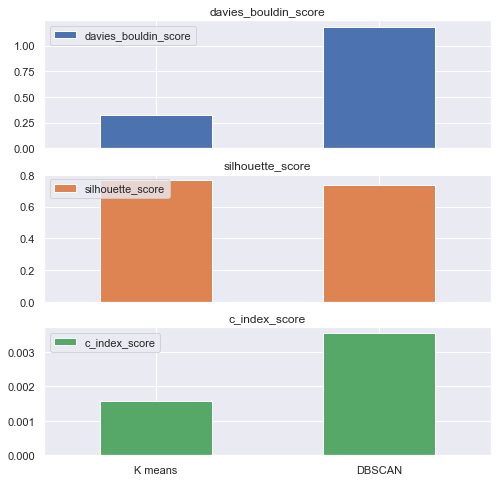

In [28]:
# plot the scores
axes = df.plot.bar(rot=0, subplots=True,figsize=(8,8))
axes[1].legend(loc=2) 

For each column (measure) created, we will print the best model from the two according to this measure.

In [29]:
for col in df:                                 # for each measure
    print('For',col,'the winnig model is:')
    # check who is the best according silhouette
    if col=='silhouette_score':                # the bigger is better (near to 1 so 1 is the best)
        if df[col][0]>df[col][1]:
            print('K means')
        else:
            print('DBSCAN')
    
    else:                                     # check who is the best according davies bouldin and c_index
        if df[col][0]<df[col][1]:             # the smaller is the better
            print('K means')
        else:
            print('DBSCAN')


For davies_bouldin_score the winnig model is:
K means
For silhouette_score the winnig model is:
K means
For c_index_score the winnig model is:
K means


# We can see that K-means got the best score in all measures.